In [4]:
# Install a pip package in the current Jupyter kernel - https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
!{sys.executable} -m pip install matplotlib numpy

Plot energy required for elites, in terms of the average number of required iterations to produce an elite.

The data is viewed vertically for each cell and horizontally across the iterations.

In [9]:
import json
#json_file_path = '/Users/bthj/QD/conf-duration_delta_pitch_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685973719958.json'
json_file_path = '/Users/bthj/QD/conf-static_mutation_rate_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685973723978.json'
x_multiplier = 1000  # Set this value as the step size in the JSON file name

# Read data from JSON file
def read_data_from_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# Read data from JSON file
data = read_data_from_json(json_file_path)

Plot the average energy per cell.

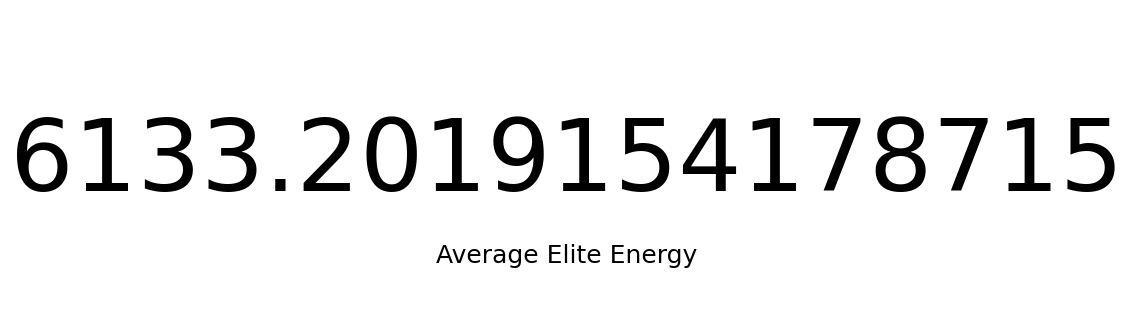

In [10]:
average_elite_energy = data['evoRuns'][0]['iterations'][0]['elitesEnergy']['averageEnergy']

# Plot the single value from average_elite_energy
import matplotlib.pyplot as plt

def plot_number_with_label(number, label):
    fig, ax = plt.subplots(figsize=(4, 4))  # Adjust the figure size as per your preference
    ax.text(0.5, 0.5, str(number), fontsize=72, ha='center', va='center')
    ax.text(0.5, 0.2, label, fontsize=18, ha='center', va='center', transform=ax.transAxes)
    ax.axis('off')  # Hide the axis

    plt.show()

plot_number_with_label(average_elite_energy, "Average Elite Energy")



Plot the average elite iteration engergy.

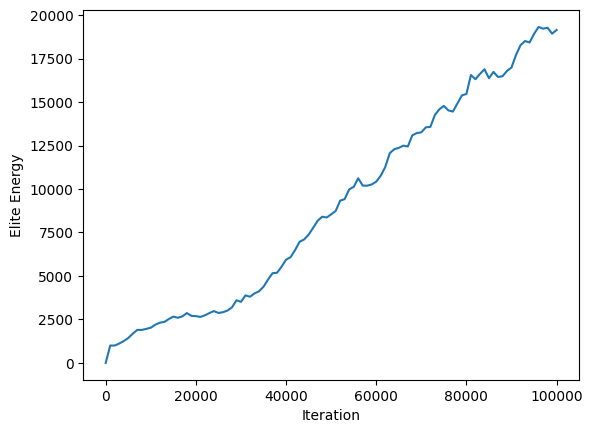

In [11]:
eliteIterationEnergies = data['evoRuns'][0]['iterations'][0]['elitesEnergy']['eliteIterationEnergies']

# Plot the list of values from eliteIterationEnergies
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(eliteIterationEnergies)) * x_multiplier, eliteIterationEnergies)
plt.xlabel('Iteration')
plt.ylabel('Elite Energy')
plt.show()


Plot a histogram of the average energy required to produce an elite, per cell.

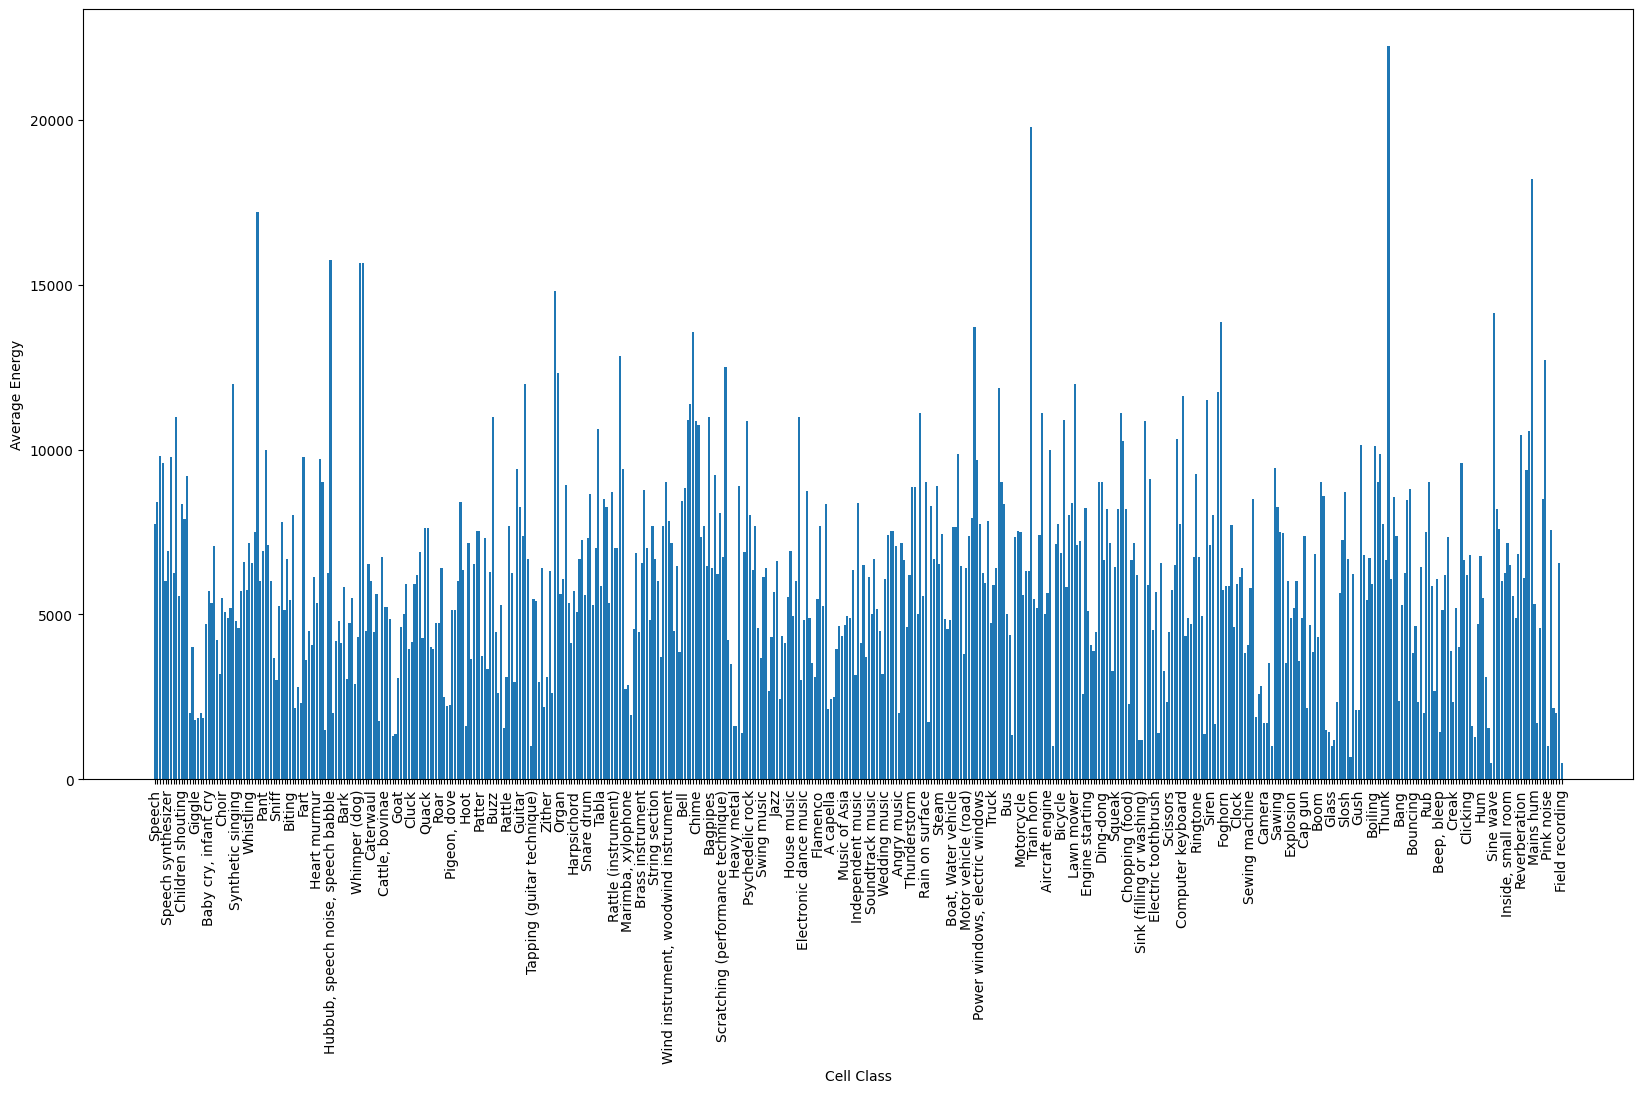

In [18]:
averageEnergyPerCell = data['evoRuns'][0]['iterations'][0]['elitesEnergy']['averageEnergyPerCell']

# Plot a histogram from the dictionary averageEnergyPerCell, where the keys are class labels and the values are the data points
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(averageEnergyPerCell.keys(), averageEnergyPerCell.values())
plt.xlabel('Cell Class')
plt.ylabel('Average Energy')
# rotate x-axis labels to avoid overlapping
plt.xticks(rotation=90)
# print only every 5th x-axis label
for index, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)
plt.show()



TODO: Could this be a JoyPy plot, not with average values but across iterations (with some step size)?